**One-bin 2A + 5B <-> 4C + 3D, with 1st-order kinetics for each species,
taken to equilibrium**

Diffusion not applicable (just 1 bin)

LAST REVISED: Aug. 11, 2022

In [1]:
# Extend the sys.path variable, to contain the project's root directory
import set_path
set_path.add_ancestor_dir_to_syspath(3)  # The number of levels to go up 
                                         # to reach the project's home, from the folder containing this notebook

Added 'D:\Docs\- MY CODE\BioSimulations\life123-Win7' to sys.path


In [2]:
from experiments.get_notebook_info import get_notebook_basename

from modules.chemicals.chemicals import Chemicals as chem
from modules.reactions.reactions import Reactions
from life_1D.bio_sim_1d import BioSim1D as bio

import plotly.express as px
from modules.html_log.html_log import HtmlLog as log
from modules.visualization.graphic_log import GraphicLog

In [3]:
# Initialize the HTML logging
log_file = get_notebook_basename() + ".log.htm"    # Use the notebook base filename for the log file

# Set up the use of some specified graphic (Vue) components
GraphicLog.config(filename=log_file,
                  components=["vue_cytoscape_1"],
                  extra_js="https://cdnjs.cloudflare.com/ajax/libs/cytoscape/3.21.2/cytoscape.umd.js",
                  home_rel_path="../../..")    # relative path is from the location of THE LOG FILE to the project's home

-> Output will be LOGGED into the file 'reaction_6.log.htm'


In [4]:
# Initialize the system
chem_data = chem(names=["A", "B", "C", "D"])     # NOTE: Diffusion not applicable (just 1 bin)

# Specify the reaction
rxn = Reactions(chem_data)

# Reaction 2A + 5B <-> 4C + 3D , with 1st-order kinetics for each species
rxn.add_reaction(reactants=[(2,"A") , (5,"B")], products=[(4,"C") , (3,"D")],
                 forward_rate=5., reverse_rate=2.)

bio.initialize_system(n_bins=1, chem_data=chem_data, reactions=rxn)

bio.set_all_uniform_concentrations( [4., 7., 5., 2.] )

bio.describe_state()

SYSTEM STATE at Time t = 0:
1 bins and 4 species:
  Species 0 (A). Diff rate: NOT SET. Conc:  [4.]
  Species 1 (B). Diff rate: NOT SET. Conc:  [7.]
  Species 2 (C). Diff rate: NOT SET. Conc:  [5.]
  Species 3 (D). Diff rate: NOT SET. Conc:  [2.]


In [5]:
rxn.describe_reactions()

Number of reactions:  1
0: 2 A + 5 B <-> 4 C + 3 D  (Rf = 5.0 / Rb = 2.0)


In [6]:
# Save the state of the concentrations of all species at bin 0
bio.save_snapshot(bio.bin_snapshot(bin_address = 0))
bio.get_history()

,A,B,C,D,SYSTEM TIME
0,4.0,7.0,5.0,2.0,0


In [7]:
# Send the plot to the HTML log file
graph_data = rxn.prepare_graph_network()
GraphicLog.export_plot(graph_data, "vue_cytoscape_1")


 {'reactants': [(2, 0, 1), (5, 1, 1)], 'products': [(4, 2, 1), (3, 3, 1)], 'Rf': 5.0, 'Rb': 2.0} 

[GRAPHIC ELEMENT SENT TO LOG FILE `reaction_6.log.htm`]


### <a name="sec_2_first_step"></a>First step

In [8]:
# First step
bio.react(time_step=0.001, n_steps=1)
bio.describe_state()

SYSTEM STATE at Time t = 0.001:
1 bins and 4 species:
  Species 0 (A). Diff rate: NOT SET. Conc:  [3.76]
  Species 1 (B). Diff rate: NOT SET. Conc:  [6.4]
  Species 2 (C). Diff rate: NOT SET. Conc:  [5.48]
  Species 3 (D). Diff rate: NOT SET. Conc:  [2.36]


_Early in the reaction :_
[A] = 3.76 ,  [B] = 6.4 ,  [C] = 5.48 ,  [D] = 2.36

In [9]:
# Save the state of the concentrations of all species at bin 0
bio.save_snapshot(bio.bin_snapshot(bin_address = 0))
bio.get_history()

,A,B,C,D,SYSTEM TIME
0,4.00,7.0,5.00,2.00,0.000
1,3.76,6.4,5.48,2.36,0.001


### <a name="sec_2"></a>Numerous more steps

In [10]:
# Numerous more steps
bio.react(time_step=0.001, n_steps=40)

bio.describe_state()

SYSTEM STATE at Time t = 0.04100000000000003:
1 bins and 4 species:
  Species 0 (A). Diff rate: NOT SET. Conc:  [2.80284552]
  Species 1 (B). Diff rate: NOT SET. Conc:  [4.00711381]
  Species 2 (C). Diff rate: NOT SET. Conc:  [7.39430896]
  Species 3 (D). Diff rate: NOT SET. Conc:  [3.79573172]


### <a name="sec_2_equilibrium"></a>Equilibrium

Consistent with the 5/2 ratio of forward/reverse rates (and the 1st order reactions),
the systems settles in the following equilibrium:  
[A] = 2.80284552 , [B] = 4.00711381 , [C] = 7.39430896 , [D] = 3.79573172

In [11]:
A_eq = bio.bin_concentration(0, 0)
B_eq = bio.bin_concentration(0, 1)
C_eq = bio.bin_concentration(0, 2)
D_eq = bio.bin_concentration(0, 3)
print(f"Ratio of equilibrium concentrations ((C_eq * D_eq) / (A_eq * B_eq)) : {(C_eq * D_eq) / (A_eq * B_eq)}")
print(f"Ratio of forward/reverse rates: {rxn.get_forward_rate(0) / rxn.get_reverse_rate(0)}")

Ratio of equilibrium concentrations ((C_eq * D_eq) / (A_eq * B_eq)) : 2.498977017845165
Ratio of forward/reverse rates: 2.5


In [12]:
# Save the state of the concentrations of all species at bin 0
bio.save_snapshot(bio.bin_snapshot(bin_address = 0))
bio.get_history()

,A,B,C,D,SYSTEM TIME
0,4.000000,7.000000,5.000000,2.000000,0.000
1,3.760000,6.400000,5.480000,2.360000,0.001
2,2.802846,4.007114,7.394309,3.795732,0.041


A and B get depleted, while C and D get produced.

**2A + 5B <-> 4C + 3D**

# Plots of changes of concentration with time

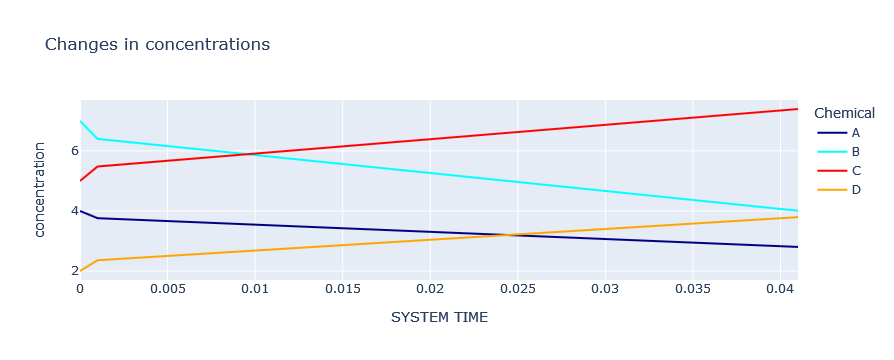

In [14]:
fig = px.line(data_frame=bio.get_history(), x="SYSTEM TIME", y=["A", "B", "C", "D"], 
              title="Changes in concentrations",
              color_discrete_sequence = ['navy', 'cyan', 'red', 'orange'],
              labels={"value":"concentration", "variable":"Chemical"})
fig.show()

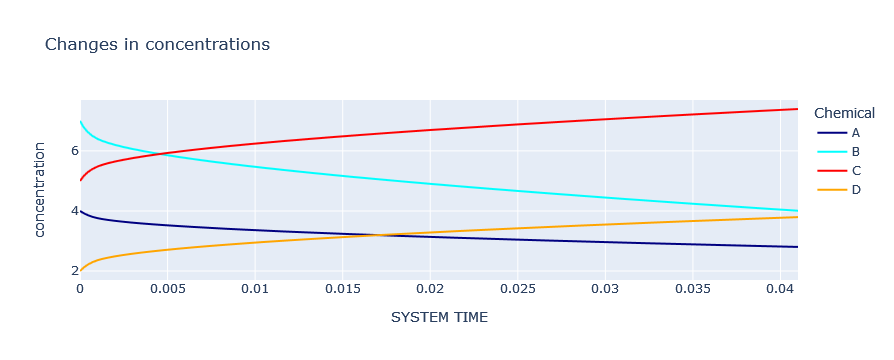

In [15]:
# Same plot, but with smooth line
fig = px.line(data_frame=bio.get_history(), x="SYSTEM TIME", y=["A", "B", "C", "D"], 
              title="Changes in concentrations",
              color_discrete_sequence = ['navy', 'cyan', 'red', 'orange'],
              labels={"value":"concentration", "variable":"Chemical"},
              line_shape="spline")
fig.show()